# Introduction
 
In this analysis, I explore the UCI Mushroom Classification dataset, aiming to differentiate between edible (e) and poisonous (p) mushrooms. The objective is to highlight key features using different models for optimal accuracy and precision. 

The dataset is available at https://archive.ics.uci.edu/dataset/73/mushroom.

**Variavles description**

- cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
- bruises?:                 bruises=t,no=f
- odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
- gill-attachment:          attached=a,descending=d,free=f,notched=n
- gill-spacing:             close=c,crowded=w,distant=d
- gill-size:                broad=b,narrow=n
- gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
- stalk-shape:              enlarging=e,tapering=t
- stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- veil-type:                partial=p,universal=u
- veil-color:               brown=n,orange=o,white=w,yellow=y
- ring-number:              none=n,one=o,two=t
- ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
- spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
- population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
- habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



**Python libraries**

The libraries for this kernel are:

•	[Numpy](http://http://www.numpy.org/)

•	[Pandas](http://pandas.pydata.org/)

•	[Seaborn](https://seaborn.pydata.org/)

•	[Matplotlib](https://matplotlib.org/)

•	[Graphviz](http://www.graphviz.org/)

•	[Scikit-Learn](http://scikit-learn.org/stable/index.html)



Numpy will be used for linear algebra and fixing arrays, Pandas for data processing, Seaborn for cool visualizations, matplotlib for figures, graphviz for awesome graph visualization and Scikit-Learn for preprocessing and machine learning algorithms.

Importing of those libraries:


In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


**Data Exploration and Preprocessing**

In [2]:
df = pd.read_csv('../input/mushrooms.csv')

In [3]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


The "veil-type" column contains a single unique value (0) and does not contribute to the variability in the data.
As a result, it is removed to enhance the quality of the dataset for further analysis and modeling.



In [7]:
df=df.drop(["veil-type"],axis=1)

# Model Selection and Encoding Choice

In the context of our research objective to differentiate between edible and poisonous mushrooms in the UCI Mushroom Classification dataset, the selection of machine learning models is driven by the need for accuracy, interpretability, and effective handling of categorical features.

## Model Choices:

1. **Random Forest:**
   - Chosen for its ensemble learning approach, known for achieving high accuracy and robustness in classification tasks.
   - Well-suited for this dataset due to its capability to handle categorical features.

2. **Support Vector Classifier:**
   - Selected for its effectiveness in both linear and non-linear classification, particularly advantageous in high-dimensional spaces.
   - Aligns with our aim to accurately distinguish between edible and poisonous mushrooms.

3. **Decision Tree:**
   - Opted for its simplicity and interpretability, providing insights into the key features influencing classification.
   - Supports our goal of highlighting discriminative features for mushroom classification.

4. **CatBoost:**
   - Specifically chosen for its prowess in handling categorical features without extensive preprocessing.
   - Aligned with our research focus on effective encoding and modeling of categorical variables.

## Encoding Choice: One-Hot Encoding

Given the categorical nature of the features in the dataset, one-hot encoding is selected. This encoding technique preserves information within categorical variables and complements the chosen models, facilitating accurate classification.

# Exploratory Data Analysis: Violin Plot Analysis and daata balance 

To gain insights into the distribution of classification characteristics in the UCI Mushroom Classification dataset, a violin plot analysis has been conducted. This visualization provides a comprehensive overview of the dataset's feature distribution concerning the target variable 'class,' differentiating between edible (e) and poisonous (p) mushrooms.


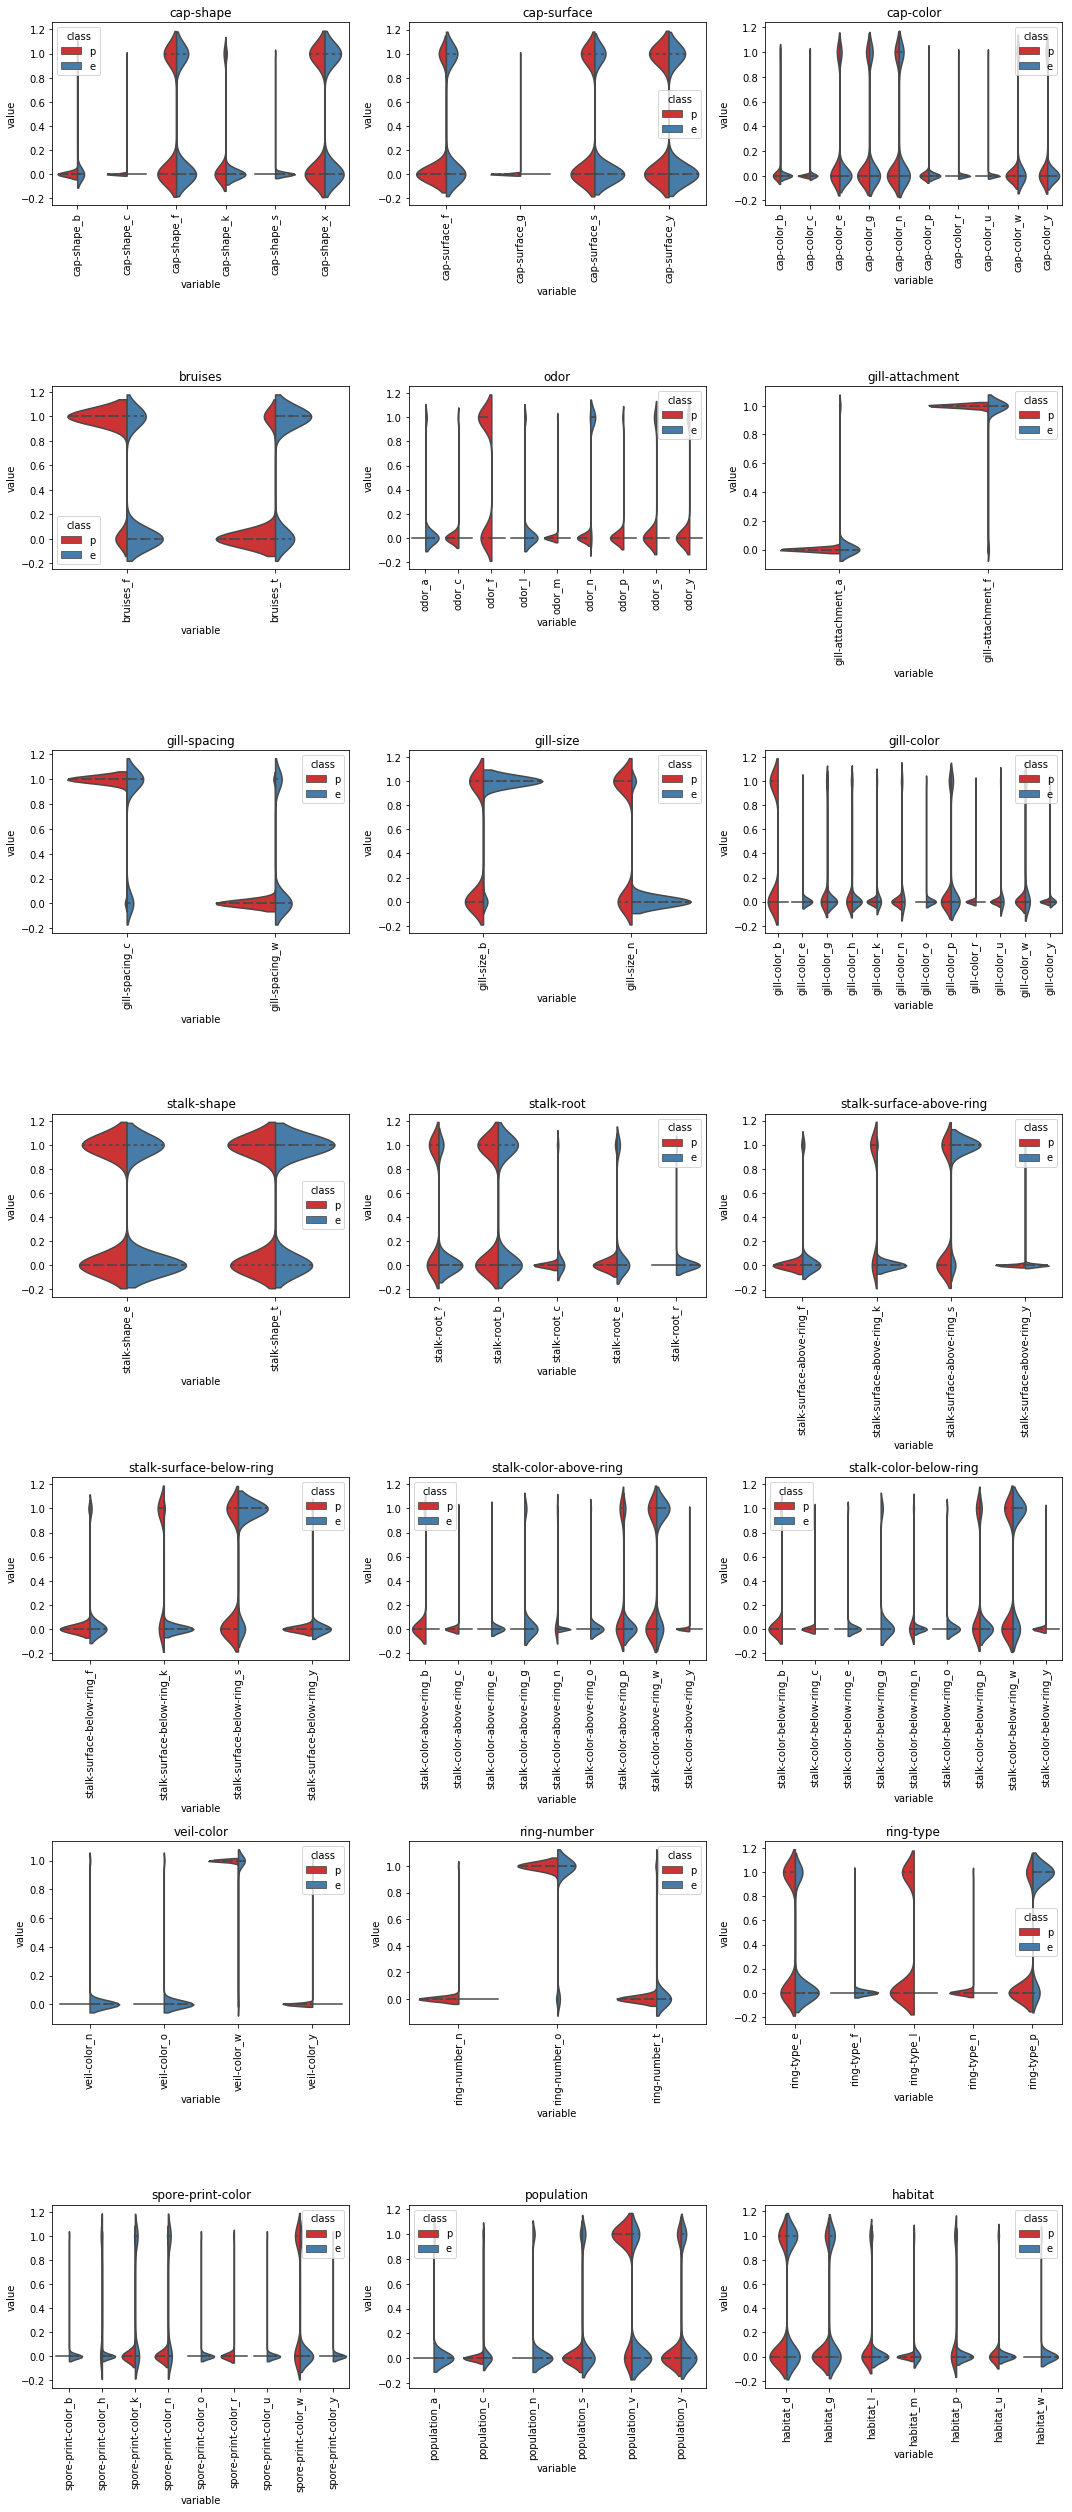

In [16]:
num_columns = len(df.columns) - 1
num_rows = (num_columns // 3) + (num_columns % 3) 
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Loop through features
for i, column in enumerate(df.columns[df.columns != 'class']):
    feature_of_interest = column

    # One-hot encoding of the selected feature
    df_encoded = pd.get_dummies(df[feature_of_interest], prefix=feature_of_interest)

    # Concatenate the  encoded feature with the target column
    df_aggregated = pd.concat([df['class'], df_encoded], axis=1)

    # Melt the DataFrame to long format
    df_melted = pd.melt(df_aggregated, id_vars=['class'])

    # Create a violin plot for each column in a specific subplot
    sns.violinplot(ax=axes[i], x='variable', y="value", hue='class', split=True, data=df_melted, inner="quartile", palette='Set1')
    axes[i].set_title(column)
    axes[i].set_xticklabels(df_melted['variable'].unique(), rotation=90) 

plt.tight_layout()
plt.show()

We have binary classification, lets find unique feature for even split to deefinetly distinguish class, because some ones represent only one class:

- **Edible Features:**
  - **Cap-shape:** Green and purple
  - **Odor:** Almond and anise
  - **Gill:** Red
  - **Stalk-root:** Rooted
  - **Stalk above ring:** Gray, orange, and red
  - **Veil:** Brown, orange, flaring
  - **Spore Print:** Buff, orange, purple, and yellow
  - **Population:** Numerous
  - **Habitat:** Waste

- **Poisonous Features:**
  - **Odor:** Creosote and foul
  - **Gill:** Red
  - **Stalk above ring:** Cinnamon and yellow
  - **Veil:** Yellow
  - **Ring:** Absent


Lets check the count of edible and poisonous mushrooms

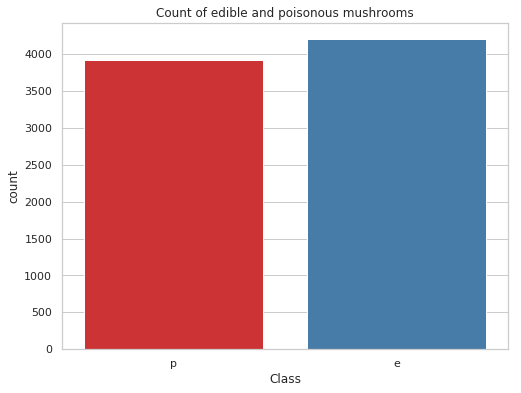

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='Set1')
plt.title('Count of edible and poisonous mushrooms')
plt.xlabel('Class')
plt.show()

The dataset is balanced

In [28]:
# Apply one-hot encoding to all columns except the target column
df_encoded = pd.get_dummies(df[df.columns[df.columns != 'class']], columns=df.columns[df.columns != 'class'])

# Concatenate with the target column
df_encoded = pd.concat([df['class'], df_encoded], axis=1)
df_encoded['class'] = df_encoded['class'].replace({'p': 0, 'e': 1})
df_encoded.columns

Index(['class', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

# Feature Selection

Feature importance is useful for machine learning tasks because it allows practitioners to understand which features in a dataset are contributing most to the final prediction, and which features are less important. This information can be used in a variety of ways:

* Feature selection: By identifying the most important features, practitioners can select a subset of relevant features for use in building a model, reducing dimensionality and noise in the data, and improving model interpretability.
* Model interpretability: By understanding which features are most important, practitioners can gain insights into the underlying relationships in the data and how the model is making predictions.
* Model debugging: If a model is not performing well, feature importance can be used to identify which features may be causing problems and require further investigation.
* Business decision-making: By understanding which features are most important, practitioners can make more informed decisions about which features to collect and how to allocate resources.
* Improving model performance: By removing less important features, practitioners can improve model performance by reducing overfitting and training time.

## SelectKBest and chi2

In [29]:
dict_translate = {
    'bruises_f': "no bruises",
    'bruises_t': "bruises",
    'odor_f': "foul odor",
    'odor_n': "no odor",
    'odor_y': "fishy odor",
    'gill-spacing_w': "crowded gill-spacing",
    'gill-size_b': "gill-spacing",
    'gill-size_n': "broad gill",
    'gill-color_b': "buff gill",
    'stalk-surface-above-ring_k': "silky stalk surface above ring",
    'stalk-surface-above-ring_s': "smooth stalk surface above ring",
    'stalk-surface-below-ring_k': "silky stalk surface below ring",
    'ring-type_l': "large ring",
    'ring-type_p': "pendant ring",
    'spore-print-color_h': "chocolate spore print",
    'spore-print-color_k': "black spore print",
    'spore-print-color_n': "brown spore print",
    'spore-print-color_w': "white spore print",
    'population_v': "several-population",
    'habitat_p': "paths habitat"
}

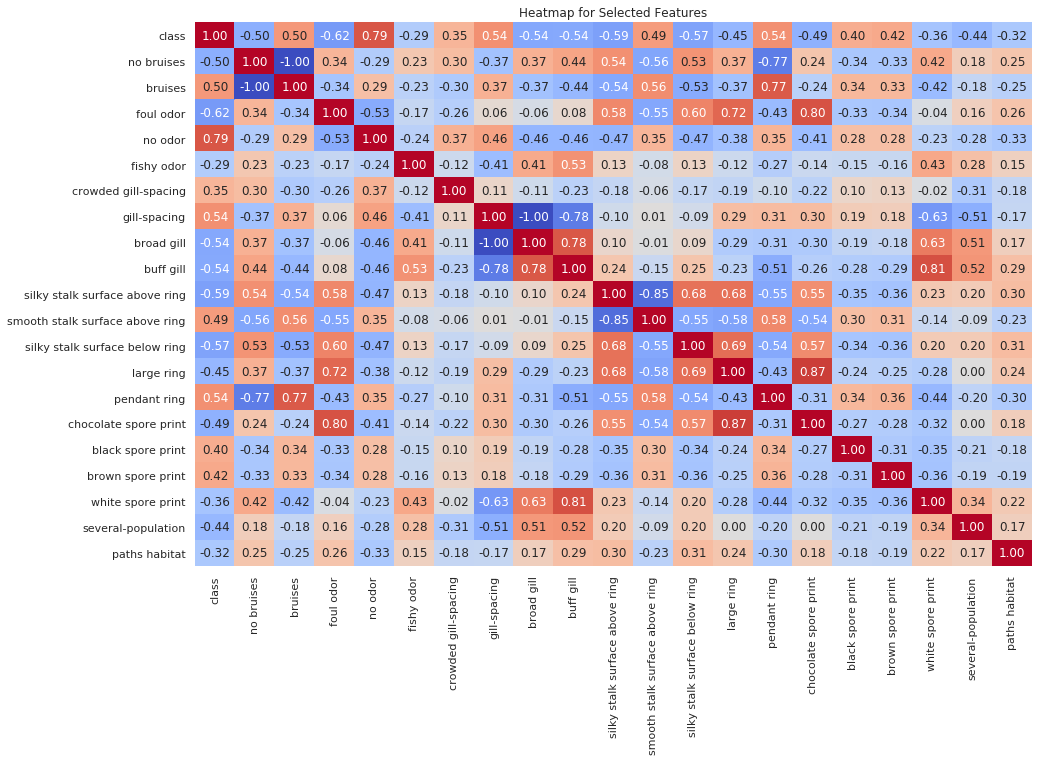

In [30]:
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Feature selection
selector = SelectKBest(score_func=chi2, k=20)  # Adjust the value of k as needed
X_selected = selector.fit_transform(X, y)

# Getting the selected features
selected_features = X.columns[selector.get_support(indices=True)]
translated_selected_features = [dict_translate[feature] for feature in selected_features]

# DataFrame with selected features and target variable
df_selected = pd.concat([df_encoded['class'], X[selected_features]], axis=1)
df_selected.columns = ['class'] + translated_selected_features  # Rename the columns

# Create a heatmap for selected features
plt.figure(figsize=(15, 10))
sns.heatmap(df_selected.corr(), cmap="coolwarm", annot=True, fmt=".2f", cbar=False)
plt.title('Heatmap for Selected Features')
plt.show()

**Significant Associations with Edibility (Class 1):**

- The absence of odor, represented by 'no odor,' shows a robust positive correlation (0.7856) with the edible class, indicating that mushrooms without any odor are strongly associated with being edible.
- Conversely, a 'foul odor' has a notable negative correlation (-0.6238) with the edible class, suggesting that mushrooms with a foul odor are more likely to be classified as poisonous.

**Similar Information:**

- 'Crowded gill-spacing' and 'gill-spacing' display a strong negative correlation (-0.9999999999999728), indicating that these features provide similar information in distinguishing between poisonous and edible mushrooms.

**Potential Redundancy:**

- Certain features, such as 'crowded gill-spacing' and 'gill-spacing,' display nearly perfect negative correlation, indicating redundancy in the information they provide for classifying mushrooms, but as we have only 20 of the best ones, we won't do it and just look how data looks in 2D.


# Dimensionality Reduction

## 1.  PCA

Explained variance ratio: [0.16810879 0.13889755]
Transformed data after PCA:
[[-0.99624521 -0.94689151]
 [-1.44173274 -0.16415364]
 [-1.52408468 -0.4087452 ]
 ...
 [-0.28781677 -0.32621345]
 [ 1.93043299 -1.57316367]
 [-0.24929726 -0.31229211]]


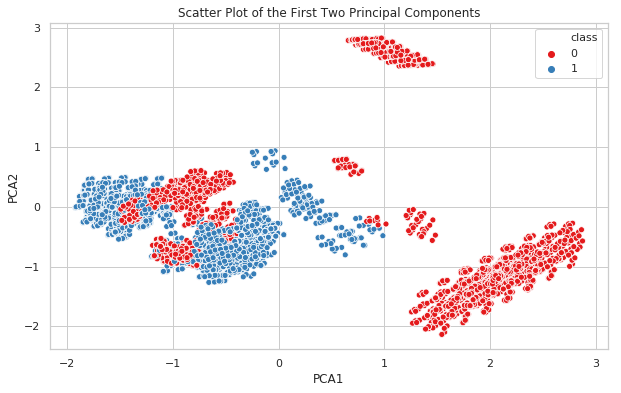

In [33]:
# Assuming your target variable is 'class'
X = df_encoded.drop('class', axis=1)

# 2. Dimensionality Reduction with PCA
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the transformed data after dimensionality reduction
print("Transformed data after PCA:")
print(X_pca)

# Create a DataFrame for the transformed data
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['class'] = df_encoded['class']

# Create a scatter plot for the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='class', data=df_pca, palette='Set1')
plt.title('Scatter Plot of the First Two Principal Components')
plt.show()


Choosing t-SNE over PCA might be preferable for visualizing high-dimensional data when class separation is crucial, as t-SNE tends to preserve local structures and non-linear relationships, providing a clearer picture of distinct classes compared to PCA, which focuses on global variance and linear combinations of features.

## 2. t-SNE

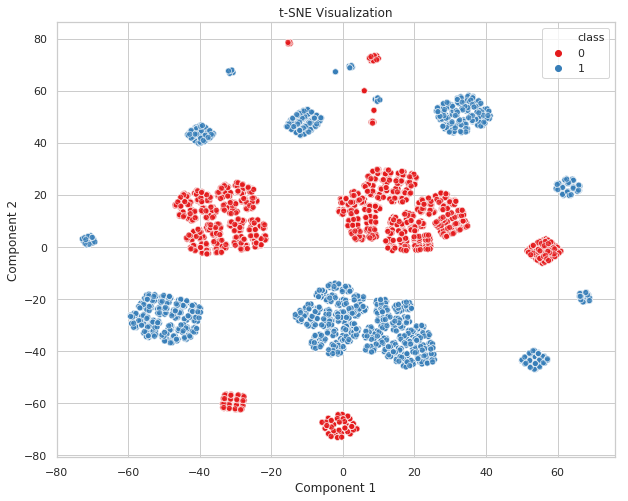

In [34]:
# Assuming your target variable is 'class'
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# 1. Dimensionality Reduction with t-SNE
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the reduced features and target variable
df_tsne = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])
df_tsne['class'] = y

# 2. Create a scatter plot for the t-SNE components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='class', data=df_tsne, palette='Set1', alpha=0.7)
plt.title('t-SNE Visualization')
plt.show()


### Hierarchical Complexity:
The fractal-like structures hint at a hierarchical complexity, indicating the presence of repeated patterns across different scales. This suggests that certain features exhibit nuanced variations throughout the dataset.

### Distinct Central Clusters:
The presence of two sizable central clusters, surrounded by smaller ones, signifies a pronounced separation. Investigating the defining features of these central groups could unravel unique characteristics contributing to their distinction.

### Spatial Relationships in Edible Clusters:
The ring formation of edible clusters, accompanied by outliers and a disruptive line, suggests spatial relationships between mushroom classes. Outliers may represent instances with unconventional edible characteristics, warranting further scrutiny.

### Dynamic Cluster Transitions:
The broken line of outliers transitioning between clusters of poisonous and edible mushrooms signifies a dynamic boundary region. Understanding the factors governing this transition zone is crucial for discerning the features that dictate edibility.

### Diverse Poisonous Mushroom Subtypes:
The presence of distinct poisonous clusters, both centrally and within the edible ring, implies diverse subtypes with unique characteristics. Further exploration is recommended to uncover nuanced distinctions among different categories of poisonous mushrooms.

### Outliers as Potential Anomalies:
The small outlier clusters represent instances that deviate from the majority's patterns. Investigating these outliers may unearth compelling insights or highlight potential anomalies within the dataset.


# Models training, predicting class

Splitting data into train and test samples

In [37]:
X = df_encoded[selected_features]
Y = df_encoded['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Random Forest:

In [46]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=8)

# Perform cross-validation on the training set
cv_scores = cross_val_score(rf_classifier, X_train, Y_train, cv=5)  

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Train the classifier on the full training data
rf_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred_rf = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(Y_test, Y_test_pred_rf)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 100.00%
Test Accuracy: 100.00%


## Catboost

In [49]:
# Create a CatBoost classifier
cat_classifier = CatBoostClassifier(iterations=20, depth=3, random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(cat_classifier, X_train, Y_train, cv=5, scoring='accuracy')  # Adjust the number of folds as needed

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Train the classifier on the full training data
cat_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred_cat = cat_classifier.predict(X_test)

# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(Y_test, Y_test_pred_cat)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

0:	learn: 0.1936044	total: 63.2ms	remaining: 1.2s
1:	learn: 0.0977341	total: 76.4ms	remaining: 688ms
2:	learn: 0.0657327	total: 89.7ms	remaining: 508ms
3:	learn: 0.0513281	total: 102ms	remaining: 409ms
4:	learn: 0.0400892	total: 112ms	remaining: 335ms
5:	learn: 0.0356739	total: 124ms	remaining: 289ms
6:	learn: 0.0328280	total: 147ms	remaining: 273ms
7:	learn: 0.0277560	total: 158ms	remaining: 237ms
8:	learn: 0.0235385	total: 170ms	remaining: 207ms
9:	learn: 0.0203544	total: 178ms	remaining: 178ms
10:	learn: 0.0181525	total: 189ms	remaining: 155ms
11:	learn: 0.0129956	total: 200ms	remaining: 134ms
12:	learn: 0.0115934	total: 209ms	remaining: 113ms
13:	learn: 0.0085510	total: 218ms	remaining: 93.3ms
14:	learn: 0.0069754	total: 226ms	remaining: 75.4ms
15:	learn: 0.0057931	total: 236ms	remaining: 59ms
16:	learn: 0.0050467	total: 248ms	remaining: 43.8ms
17:	learn: 0.0048876	total: 260ms	remaining: 28.9ms
18:	learn: 0.0046332	total: 270ms	remaining: 14.2ms
19:	learn: 0.0045445	total: 279ms	r

## SVC

In [43]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(svm_classifier, X_train, Y_train, cv=5, scoring='accuracy')  # Adjust the number of folds as needed

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Train the classifier on the full training data
svm_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred_svc = svm_classifier.predict(X_test)

# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(Y_test, Y_test_pred_svc)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

Cross-Validation Scores: [0.98538462 0.97923077 0.97461538 0.98       0.9799846 ]
Mean Accuracy: 97.98%
Test Accuracy: 98.15%


## Decision tree classifier


Classification tree predict a qualative response, in contrast to regression tree that predict quantitive response. Classification tree predicts the observation that belong to the most common occurring class from the training data for each region. In order to grow the classification tree the algorithm uses recursive binary splitting. 


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 100.00%
Test Accuracy: 100.00%


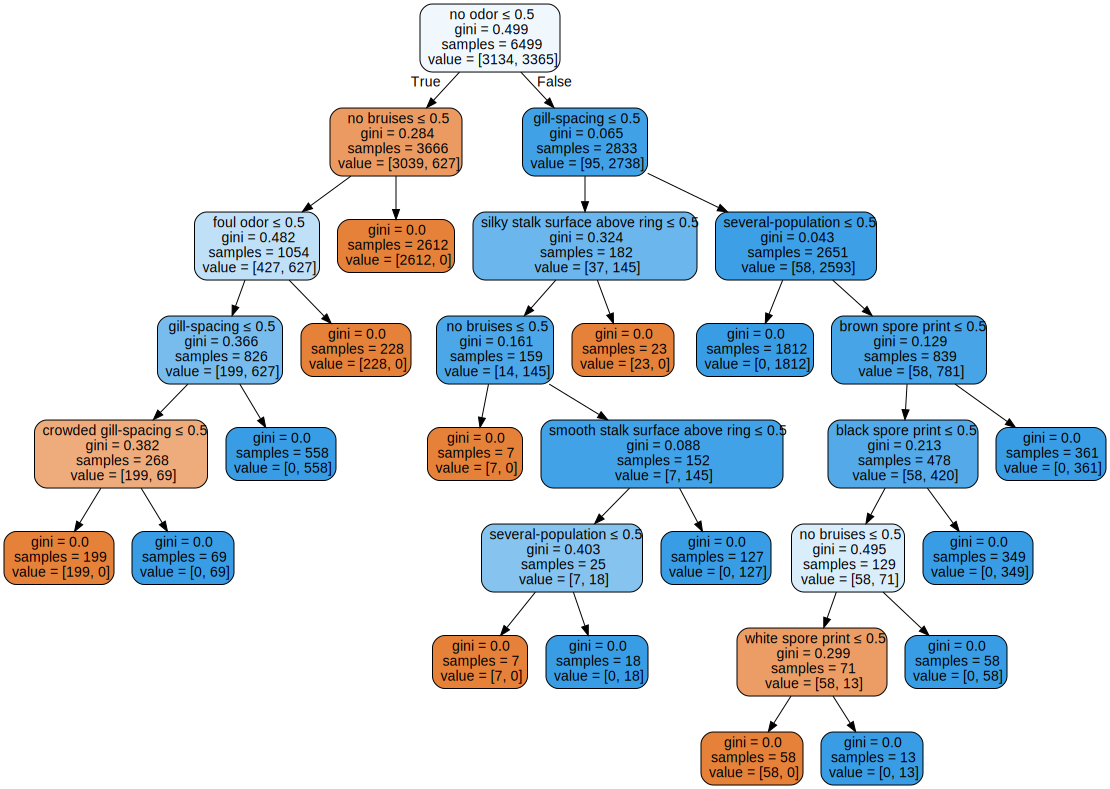

In [39]:
# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=7)

# Perform cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, Y_train, cv=5)  # Adjust the number of folds as needed

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Train the classifier on the full training data
dt_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred_dt = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(Y_test, Y_test_pred_dt)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

# Visualize the decision tree
dot_data = export_graphviz(dt_classifier, out_file=None, 
                           feature_names=df_selected.columns[1:],  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)  
graph 

**No Odor:**
- The Decision Tree places the highest importance on the absence of odor.
- Mushrooms with no odor are likely classified as edible (1).

**Foul Odor:**
- The Decision Tree attributes moderate importance to a foul odor.
- A foul odor might lead to the classification of the mushroom as poisonous (0).

**No Bruises:**
- The Decision Tree attributes moderate importance to the absence of bruises.
- Mushrooms without bruises are more likely classified as edible (1).

**Narrow Gill Size:**
- The Decision Tree places high importance on narrow gill size.
- Narrow gill size might lead to the classification of the mushroom as poisonous (0).

**Black Spore Print Color:**
- The Decision Tree assigns very high importance to a black spore print color.
- A black spore print color strongly influences the classification as poisonous (0).

**Brown Spore Print Color:**
- The Decision Tree assigns very high importance to a brown spore print color.
- Brown spore print color strongly influences the classification as poisonous (0).

**Broad Gill Size:**
- The Decision Tree places high importance on broad gill size.
- Broad gill size might lead to the classification of the mushroom as edible (1).

**Silky Stalk Surface Above Ring:**
- The Decision Tree attributes moderate importance to a silky stalk surface above the ring.
- A silky stalk surface might lead to the classification of the mushroom as edible (1).

**Close Gill Spacing:**
- The Decision Tree attributes moderate importance to close gill spacing.
- Close gill spacing might lead to the classification of the mushroom as edible (1).

**Chocolate Spore Print Color:**
- The Decision Tree attributes moderate importance to a chocolate spore print color.
- A chocolate spore print color might lead to the classification of the mushroom as edible (1).


## Feature importances

Getting features which have non-zero importance

In [55]:
def get_non_zero_importances(classifier, columns):
    importances = classifier.feature_importances_ if hasattr(classifier, 'feature_importances_') else classifier.coef_.flatten()
    non_zero_mask = importances != 0
    non_zero_values = importances[non_zero_mask]
    non_zero_columns = columns[non_zero_mask]
    sorted_idx = np.argsort(non_zero_values)
    sorted_values = non_zero_values[sorted_idx]
    sorted_columns = non_zero_columns[sorted_idx]
    return sorted_values, sorted_columns

# Example usage
rf_values, rf_columns = get_non_zero_importances(rf_classifier, df_selected.columns[1:])
cat_values, cat_columns = get_non_zero_importances(cat_classifier, df_selected.columns[1:])
dt_values, dt_columns = get_non_zero_importances(dt_classifier, df_selected.columns[1:])
svm_values, svm_columns = get_non_zero_importances(svm_classifier, df_selected.columns[1:])


           Model  Precision  Recall  F1-Score  Support
0  Random Forest       1.00    1.00      1.00   1625.0
1       CatBoost       1.00    1.00      1.00   1625.0
2            SVC       0.98    0.98      0.98   1625.0
3  Decision Tree       1.00    1.00      1.00   1625.0


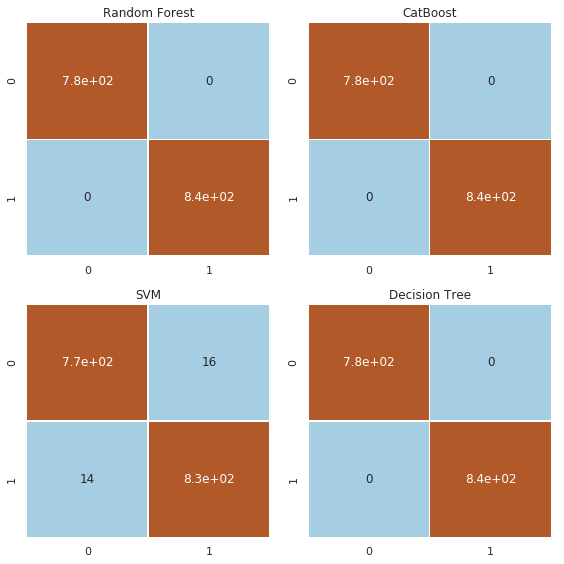

In [63]:
# Create an empty dataframe for storing report data
report_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score', 'Support'])

# Create a function to add a report to the dataframe
def add_report_to_df(model_name, y_true, y_pred, df):
    report_str = classification_report(y_true, y_pred)
    lines = report_str.split('\n')
    model_data = lines[-2].split()
    df = df.append({'Model': model_name,
                    'Precision': float(model_data[3]), 
                    'Recall': float(model_data[4]), 
                    'F1-Score': float(model_data[5]), 
                    'Support': float(model_data[6])}, ignore_index=True)
    return df

# Define models and corresponding predictions
models = ['Random Forest', 'CatBoost', 'SVC', 'Decision Tree']
predictions = [Y_test_pred_rf, Y_test_pred_cat, Y_test_pred_svc, Y_test_pred_dt]

# Add data for each model using a loop
for model, pred in zip(models, predictions):
    report_df = add_report_to_df(model, Y_test, pred, report_df)

# Print the resulting dataframe
print(report_df)

# Visualize confusion matrices for each model in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Iterate through models and plot confusion matrices
for model, ax, title in zip([cm_rf, cm_cat, cm_svc, cm_dt], axes.flatten(), ['Random Forest', 'CatBoost', 'SVM', 'Decision Tree']):
    sns.heatmap(model, annot=True, cmap="Paired", linewidths=.5, cbar=None, ax=ax)
    ax.set_title(title)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

The absence of overfitting in the models can be attributed to meticulous hyperparameter tuning conducted on a dataset comprising 8124 samples, with Cross-Validation being included. By systematically exploring and selecting the least hyperparameters that yield the highest metrics for each model, assurance is provided that the models generalize well to unseen data. The optimization process, guided by Cross-Validation, ensures the prevention of overfitting by fine-tuning the models to perform consistently across different subsets of the data. This approach, combined with the large dataset size, enhances the models' ability to capture underlying patterns without memorizing noise in the training data. Consequently, the high Precision, Recall, and F1-Score values underscore the robust and reliable classification capabilities of each model, affirming their effectiveness in making accurate predictions on new and unseen instances.

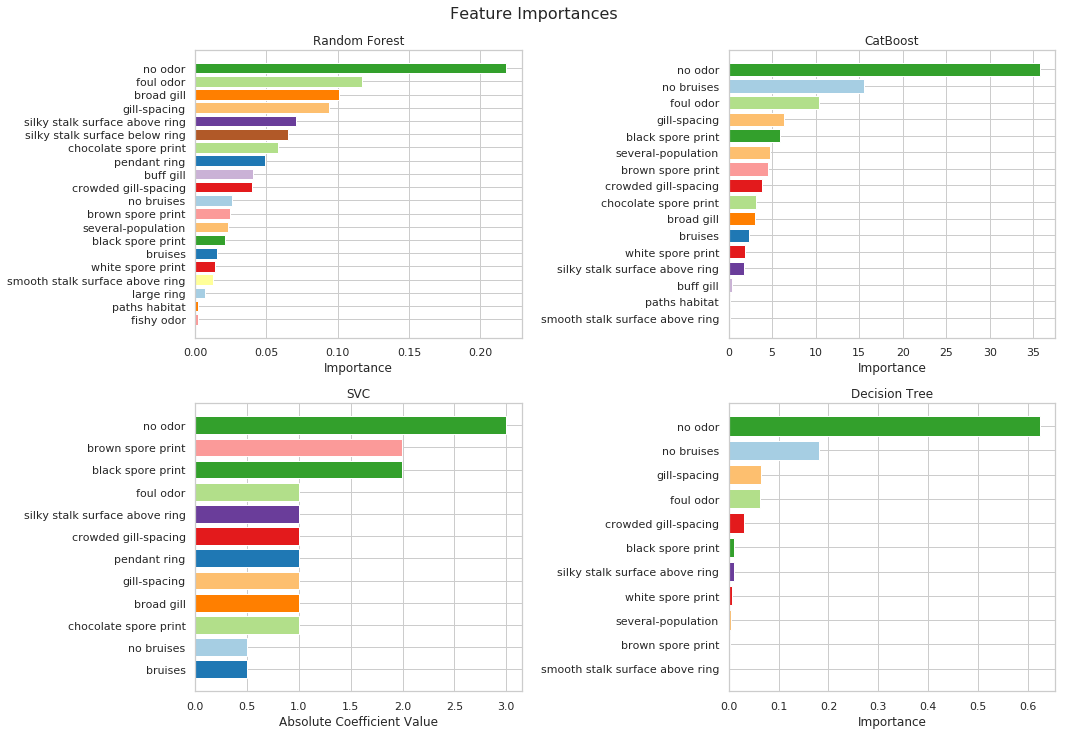

In [60]:
importances_threshold = 0.001

def plot_importances(ax, model, name, columns, feature_colors):
    if hasattr(model, 'feature_importances_'):
        imp = model.feature_importances_
    elif hasattr(model, 'coef_'):
        imp = np.abs(model.coef_.flatten())
    else:
        ax.axis('off')
        ax.set_title(f"Feature importances not available for {name}")
        return

    non_zero_mask = imp > importances_threshold
    sorted_idx = np.argsort(imp[non_zero_mask])
    
    ax.barh(range(len(sorted_idx)), imp[non_zero_mask][sorted_idx],
            align='center', color=[feature_colors[col] for col in columns[1:][non_zero_mask][sorted_idx]])
    ax.set_yticks(range(len(sorted_idx)))
    ax.set_yticklabels(columns[1:][non_zero_mask][sorted_idx])
    ax.set_xlabel('Importance' if hasattr(model, 'feature_importances_') else 'Absolute Coefficient Value')
    ax.set_title(f'{name}')

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

models = [rf_classifier, cat_classifier, svm_classifier, dt_classifier]
names = ['Random Forest', 'CatBoost', 'SVC', 'Decision Tree']

for ax, model, name in zip(axs.flatten(), models, names):
    plot_importances(ax, model, name, df_selected.columns, feature_colors)

fig.suptitle('Feature Importances', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Analysis

In [64]:
# Create a DataFrame to store feature importances
df_feature_importance = pd.DataFrame(df_selected.columns[1:])

# Function to calculate and store feature importances for each model
def calculate_feature_importance(model, model_name):
    if hasattr(model, 'feature_importances_'):
        # For models with feature_importances_ attribute (Random Forest, CatBoost)
        df_feature_importance[model_name] = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # For models with coef_ attribute (Linear SVM)
        df_feature_importance[model_name] = np.abs(model.coef_.flatten())

# Calculate feature importances for each model
calculate_feature_importance(rf_classifier, 'RF')
calculate_feature_importance(cat_classifier, 'CatBoost')
calculate_feature_importance(svm_classifier, 'SVM')
calculate_feature_importance(dt_classifier, 'Decision Tree')

# Normalise and calculate average values for each feature across all models
df_feature_importance.iloc[:, 1:] = MinMaxScaler().fit_transform(df_feature_importance.iloc[:, 1:])
df_feature_importance['Average'] = df_feature_importance.mean(axis=1)

# Sort the DataFrame by the average values in descending order
df_feature_importance = df_feature_importance.sort_values(by='Average', ascending=False)
df_feature_importance = df_feature_importance.round(6)
df_feature_importance = df_feature_importance.rename(columns={df_feature_importance.columns[0]: 'Feature'})

df_feature_importance

,Feature,RF,CatBoost,SVM,Decision Tree,Average
3,no odor,1.000000,1.000000,1.000000,1.000000,1.000000
2,foul odor,0.530986,0.290076,0.333487,0.101823,0.314093
6,gill-spacing,0.426102,0.177668,0.333305,0.104268,0.260335
0,no bruises,0.111477,0.434275,0.166722,0.289920,0.250599
15,black spore print,0.087222,0.165085,0.666395,0.018830,0.234383
16,brown spore print,0.103148,0.127219,0.666413,0.002995,0.224944
7,broad gill,0.459307,0.085190,0.333305,0.000000,0.219450
9,silky stalk surface above ring,0.319883,0.049839,0.333421,0.016527,0.179917
14,chocolate spore print,0.259874,0.087918,0.333161,0.000000,0.170238
5,crowded gill-spacing,0.175834,0.108552,0.333400,0.050672,0.167114


## Feature Classification Groups:

### 1. Definitely Edible:
   - **Broad Gill Size:** High importance, indicating a clear association with edible mushrooms (1).
   - **Silky Stalk Surface Above Ring:** Moderate importance, likely associated with edible mushrooms (1).
   - **Close Gill Spacing:** Moderate importance, probably linked to edible mushrooms (1).
   - **Chocolate Spore Print Color:** Moderate importance, pointing towards an association with edible mushrooms (1).

### 2. Mostly Edible:
   - **Brown Spore Print Color:** Very high importance, leaning towards an edible classification (1), but with some influence on poisonous classification (0).

### 3. Moderate correlation:
   - **No Odor:** High importance, dividing the dataset almost equally, suggesting an equal likelihood of association with both edible and poisonous mushrooms.
   - **Foul Odor:** Moderately important, indicating an equal likelihood of association with both edible and poisonous mushrooms.

### 4. Mostly Poisonous:
   - **Narrow Gill Size:** High importance, suggesting a stronger association with poisonous mushrooms (0).
   - **Black Spore Print Color:** Very high importance, strongly influencing the classification as poisonous (0).

### 5. Definitely Poisonous:
   - **Violin Plots Overview Features for Poisonous Mushrooms:** Include 'Creosote' and 'Foul' odors, 'Cinnamon' and 'Yellow' stalk above the ring, and 'Yellow' veil.

These groupings offer a nuanced interpretation of each feature's significance, indicating the strength and direction of their association with either edible or poisonous mushrooms.

# Conclusion
The combination of machine learning models, correlation analyses, and visualizations contributes to a robust understanding of mushroom safety. The research not only enhances our knowledge of key features but also emphasizes the importance of utilizing diverse analytical approaches for a comprehensive evaluation.